## Clase 3a. Clasificacion y  Ensambles

In [85]:
import pandas as pd

# Import numpy
import numpy as np
import seaborn as sns
# Import matplotlib for graphs, set inline
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
# Import datasets for use
from sklearn import datasets

# Visualizacion de datos

In [86]:
iris = datasets.load_iris()
iris_df= pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["class"]=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [87]:
iris_df.info() # info de la data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


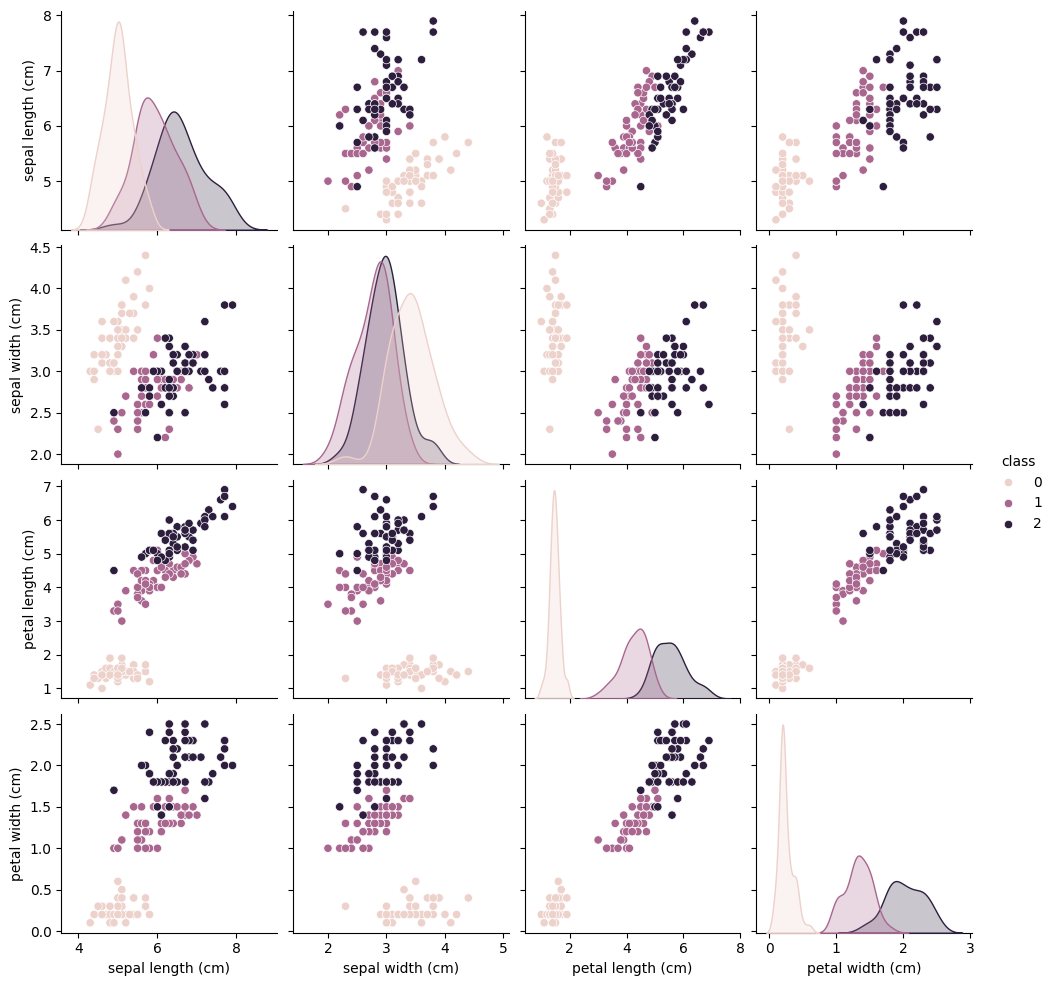

In [88]:
g= sns.pairplot(iris_df, hue='class',kind="scatter") # visualización para entender mejor las clases mas adecuadas 

la garfcia 4 del tercer reglon parece teenr buen resultado con respecto al ancho y olargo del petalo. 

<Axes: >

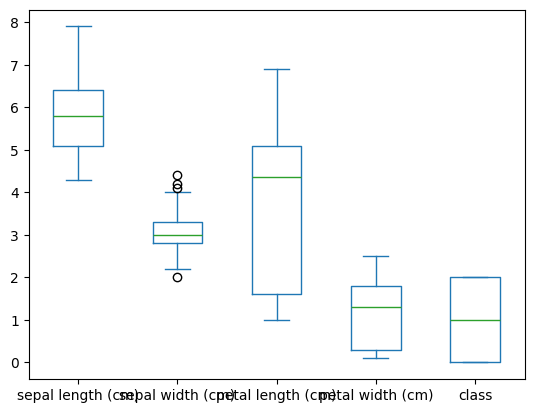

In [89]:
iris_df.plot(kind='box')

In [90]:
y= iris_df['class'] # definimo la avriable Y 
X=iris_df.drop('class',axis=1) #definimos X 
features_num=["sepal length (cm)","petal length (cm)","petal width (cm)"] # ahora hacemos features_num (ver uqe hace en clase1 )
features_num_outlier= ["sepal width (cm)"]  # se elima los atipicos vistos en la avriable en el boxplot
X =X[features_num_outlier+features_num] 

# Split de datos entrenamiento  80%, test 20%

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)

# Preprocesamiento y Feature Engineering

In [92]:
from sklearn.pipeline import Pipeline,make_pipeline,FeatureUnion
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [93]:
class NumericalIQscaler(BaseEstimator,TransformerMixin):
    def __init__(self, columns):
        self.columns=columns
        self._scaler = RobustScaler()
        return None
    
    def fit(self, X,y=None):
      
        X = self._scaler.fit(X)
        return self
    
    def remover_outlier(self, X):
        x= pd.DataFrame(X,columns=self.columns)

        for col in x.columns:
            Q1= x[col].quantile(0.25)
            Q3= x[col].quantile(0.75)
            IQR= Q3-Q1
            low= Q1 -1.5*IQR
            high= Q1+1.5*IQR

            x[col] = np.where(x[col]<low,low,x[col])
            x[col] = np.where(x[col]>high, high,x[col])
        return x
    def transform(self, X):
        #X=> dataframe => X.columns, X.index, X.head(), X.sample() 
        X =self.remover_outlier(X)
        X=pd.DataFrame(self._scaler.transform(X),columns=X.columns,index=X.index)
        return X

In [94]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [95]:
X_train.columns

Index(['sepal width (cm)', 'sepal length (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [96]:
preprocessor_robust = ColumnTransformer( #solo para el atipico
    transformers=[
     ("robust", NumericalIQscaler(columns=features_num_outlier), features_num_outlier )   
    ]
)
# alos demas solo hizo scaler
preprocessor_num= ColumnTransformer(
transformers=[
    ("transf. num", StandardScaler(), features_num )
]

)

preprocessor_union = FeatureUnion(

    transformer_list=[
        ("robust_column",preprocessor_robust ),
        ("scaler numerical", preprocessor_num)
    ]
)

In [14]:
preprocessor_union

FeatureUnion(transformer_list=[('robust_column',
                                ColumnTransformer(transformers=[('robust',
                                                                 NumericalIQscaler(columns=['sepal '
                                                                                            'width '
                                                                                            '(cm)']),
                                                                 ['sepal width '
                                                                  '(cm)'])])),
                               ('scaler numerical',
                                ColumnTransformer(transformers=[('transf. num',
                                                                 StandardScaler(),
                                                                 ['sepal '
                                                                  'length (cm)',
                                                                  'petal '
                                                                  'length (cm)',
                                                                  'petal width '
                                                                  '(cm)'])]))])

# Logistic regression

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
pipeline =Pipeline(
    steps=[
        ("preprocesamiento",preprocessor_union),
        ("LogisticRegression", LogisticRegression())
    ])

In [217]:
pipeline

Pipeline(steps=[('preprocesamiento',
                 FeatureUnion(transformer_list=[('robust_column',
                                                 ColumnTransformer(transformers=[('robust',
                                                                                  NumericalIQscaler(columns=['sepal '
                                                                                                             'width '
                                                                                                             '(cm)']),
                                                                                  ['sepal '
                                                                                   'width '
                                                                                   '(cm)'])])),
                                                ('scaler numerical',
                                                 ColumnTransformer(transformers=[('transf. '
                                                                                  'num',
                                                                                  StandardScaler(),
                                                                                  ['sepal '
                                                                                   'length '
                                                                                   '(cm)',
                                                                                   'petal '
                                                                                   'length '
                                                                                   '(cm)',
                                                                                   'petal '
                                                                                   'width '
                                                                                   '(cm)'])]))])),
                ('LogisticRegression', LogisticRegression())])

In [99]:
modelLR = pipeline.fit(X_train,y_train)

In [15]:
modelLR 

Pipeline(steps=[('preprocesamiento',
                 FeatureUnion(transformer_list=[('robust_column',
                                                 ColumnTransformer(transformers=[('robust',
                                                                                  NumericalIQscaler(columns=['sepal '
                                                                                                             'width '
                                                                                                             '(cm)']),
                                                                                  ['sepal '
                                                                                   'width '
                                                                                   '(cm)'])])),
                                                ('scaler numerical',
                                                 ColumnTransformer(transformers=[('transf. '
                                                                                  'num',
                                                                                  StandardScaler(),
                                                                                  ['sepal '
                                                                                   'length '
                                                                                   '(cm)',
                                                                                   'petal '
                                                                                   'length '
                                                                                   '(cm)',
                                                                                   'petal '
                                                                                   'width '
                                                                                   '(cm)'])]))])),
                ('LogisticRegression', LogisticRegression())])

In [100]:
modelLR.score(X_test,y_test) #metrica, tambien se puede el accuracy

0.9666666666666667

In [101]:
predictLR = modelLR.predict(X_test) #prediccion mando los datos de test de una en el pipelien

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,RocCurveDisplay

In [103]:
class_report_LR = classification_report(y_test,predictLR ) # el reporte
print(class_report_LR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



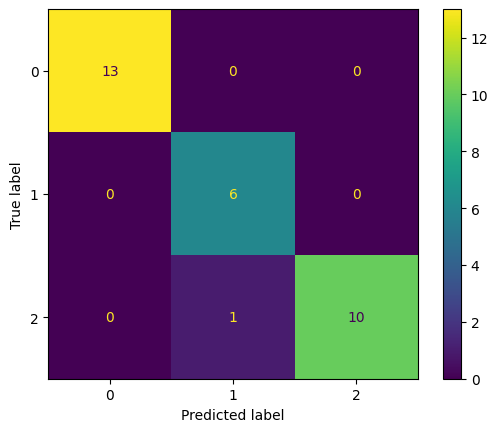

In [104]:
ConfusionMatrixDisplay.from_estimator(modelLR, X_test,y_test)

cura ROC .(clasificación binaria)

In [105]:
from sklearn.metrics import RocCurveDisplay
from sklearn import preprocessing

In [106]:
lb = preprocessing.LabelBinarizer() #instancia
y_test_lb = lb.fit_transform(y_test) #preprocesamiento que poasa eso a una parte binaria . porque no es binaria entonce hay que binalizar

In [107]:
y_test_lb[:9] #genera como uan especie omo one hot enconder

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [108]:
y_test_lb[:5]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [109]:
predictLR_lb = lb.transform(predictLR) #aplicando el lb

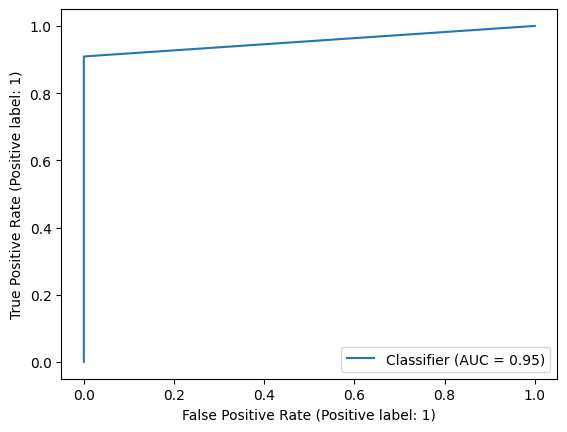

In [110]:
class_num=2
RocCurveDisplay.from_predictions(y_test_lb[:,class_num],
predictLR_lb[:,class_num]
)


# Naive Bayes

ese modelo consiste en asumir que los atributos son inependientes.

In [111]:
iris_df #tenemoss 4 atributos

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [112]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
GNB =GaussianNB() #instancia

In [113]:
score = cross_val_score(GNB,X_train,y_train,cv=5)  # hace lo mismo que fit pero usando validaicon cruzada #aqui ya no lo hicimos con fit. #tenemos 5 kfulls

el grafico muestra los accuracys para cada kfull

Text(0.5, 1.0, ' valor promedio del accuracy: 0.95')

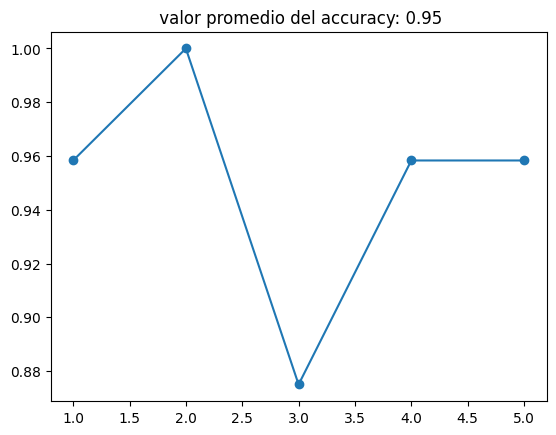

In [114]:
folds= np.array(range(1,6))
plt.scatter(folds,score)
plt.plot(folds,score)
plt.title(f" valor promedio del accuracy: {score.mean()}")

# Arboles de decision

In [115]:
from sklearn import tree

In [116]:
pipelinetree = Pipeline(
    steps=[
        ("preprocessing",preprocessor_union),
        ('tree', tree.DecisionTreeClassifier(criterion='entropy'))
    ]
)

In [117]:
modeltree =pipelinetree.fit(X_train,y_train)

In [118]:
modeltree

Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('robust_column',
                                                 ColumnTransformer(transformers=[('robust',
                                                                                  NumericalIQscaler(columns=['sepal '
                                                                                                             'width '
                                                                                                             '(cm)']),
                                                                                  ['sepal '
                                                                                   'width '
                                                                                   '(cm)'])])),
                                                ('scaler numerical',
                                                 ColumnTransformer(transformers=[('transf. '
                                                                                  'num',
                                                                                  StandardScaler(),
                                                                                  ['sepal '
                                                                                   'length '
                                                                                   '(cm)',
                                                                                   'petal '
                                                                                   'length '
                                                                                   '(cm)',
                                                                                   'petal '
                                                                                   'width '
                                                                                   '(cm)'])]))])),
                ('tree', DecisionTreeClassifier(criterion='entropy'))])

[Text(0.5, 0.9166666666666666, 'petal width (cm) <= -0.575\nentropy = 1.581\nsamples = 120\nvalue = [37, 44, 39]\nclass = versicolor'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 0.712\nentropy = 0.997\nsamples = 83\nvalue = [0, 44, 39]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 0.656\nentropy = 0.42\nsamples = 47\nvalue = [0, 43, 4]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 0.577\nentropy = 0.162\nsamples = 42\nvalue = [0, 41, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 41\nvalue = [0, 41, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 0.441\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]\nclas

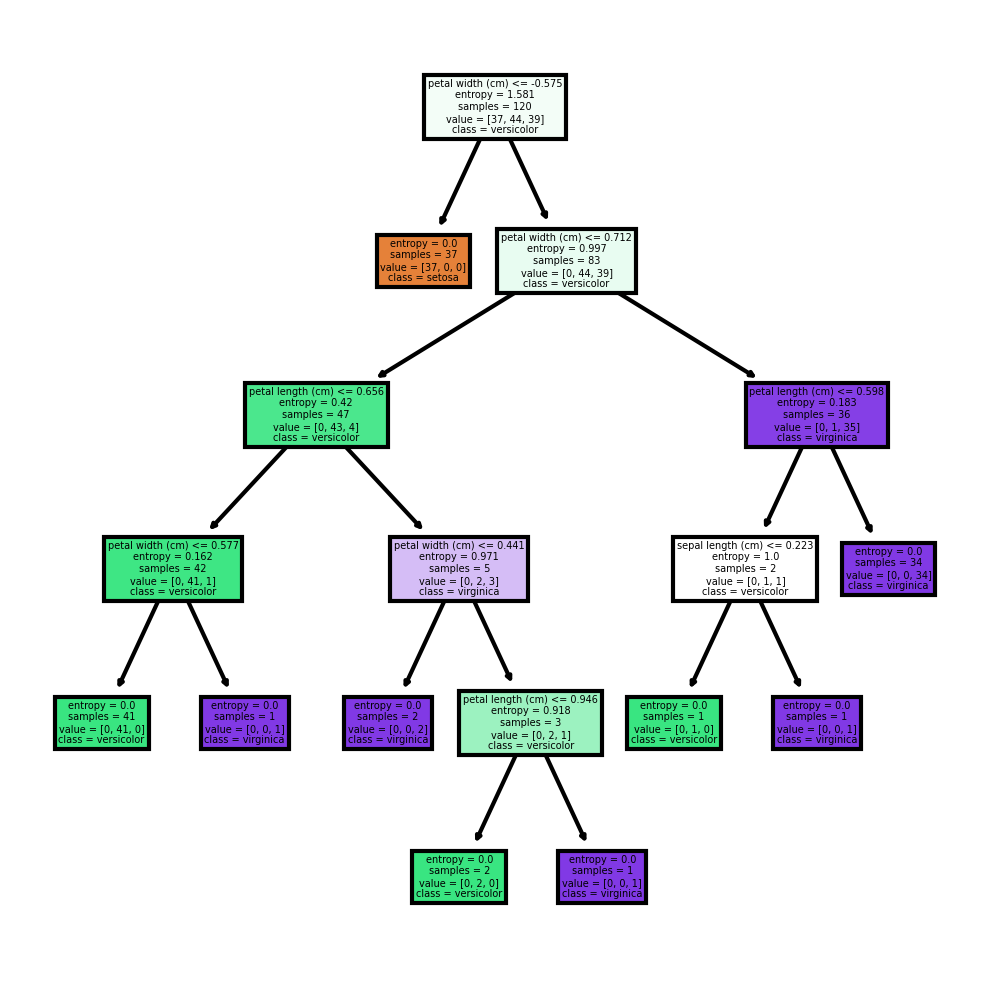

In [119]:
fig, axis =plt.subplots(nrows =1, ncols=1, figsize=(4,4),dpi=300)
fn = features_num_outlier+features_num
cn=  ['setosa', 'versicolor', 'virginica']
tree.plot_tree(pipelinetree["tree"],feature_names=fn, class_names=cn,filled=True )


In [120]:
texttree= tree.export_text(pipelinetree['tree'])
print(texttree)

|--- feature_3 <= -0.57
|   |--- class: 0
|--- feature_3 >  -0.57
|   |--- feature_3 <= 0.71
|   |   |--- feature_2 <= 0.66
|   |   |   |--- feature_3 <= 0.58
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.58
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  0.66
|   |   |   |--- feature_3 <= 0.44
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  0.44
|   |   |   |   |--- feature_2 <= 0.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  0.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  0.71
|   |   |--- feature_2 <= 0.60
|   |   |   |--- feature_1 <= 0.22
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.22
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  0.60
|   |   |   |--- class: 2



In [44]:
pip install graphviz

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

#otra forma de visualizar . No corrre

import graphviz
import os
#os.environ["PATH"] += os.pathsep + 'C:\Users\javier\miniconda3\envs\py10\Lib\site-packages\graphviz\'

treedata= tree.export_graphviz( pipelinetree["tree"],feature_names=fn, class_names=cn,filled=True)
graph = graphviz.Source(treedata)
graph

In [172]:
pip install dtreeviz

"pip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
#otra forma  No corre

viz = dtreeviz.model(pipelinetree["tree"],X_train= X_test,y_train=y_test, target_name='class', feature_names=fn, class_names=cn)

#viz.view()

In [122]:
print(X_test.iloc[1],cn[y_test.iloc[1]])

sepal width (cm)     3.0
sepal length (cm)    6.8
petal length (cm)    5.5
petal width (cm)     2.1
Name: 112, dtype: float64 virginica


In [252]:
#viz.view(x=X_test.iloc[1])

eature_importance: que atributos son importantes para hacer la prediccion . La grafica vas mostrando el grado de importancia. ara el procesamientro puedo hacer el arbol de desicion para poder hacer lo de feature_importance para pdoer ver los atributos en la base de datos.  Es decir no solo s eusa para la parte de l modelo si no para la fase de exploracion y visualizacion. 

In [ ]:
viz.instance_feature_importance(X_test.iloc[0]) # muestra los atibutos mas importantes para el registro de x_test para el primer elemento. 
#tamvien se puede para todo el conjunto de datos

In [ ]:
viz.leaf_sizes()

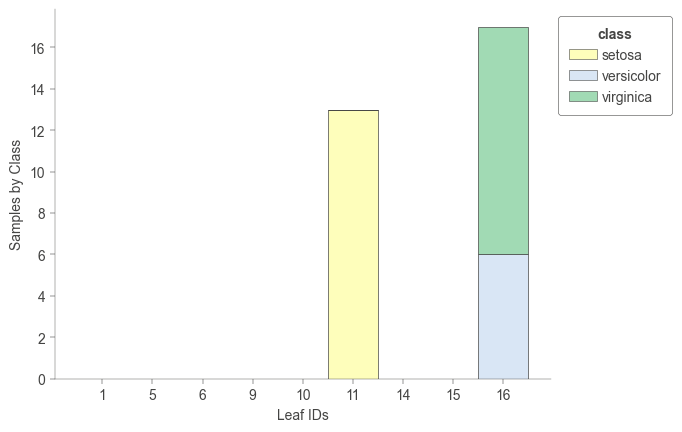

In [255]:
viz.ctree_leaf_distributions()

In [256]:
viz.node_stats(node_id=2)

,sepal width (cm),sepal length (cm),petal length (cm),petal width (cm)
count,30.0,30.0,30.0,30.0
mean,3.123333,5.74,3.506667,1.1
std,0.41745,0.893115,1.914362,0.846901
min,2.3,4.3,1.1,0.1
25%,2.9,5.125,1.4,0.2
50%,3.0,5.55,4.25,1.3
75%,3.4,6.3,5.05,1.8
max,4.2,7.7,6.7,2.3


In [125]:
importances = modeltree['tree'].feature_importances_ # para todo el conjunto de datos.  lo de importancia de atrinutos

In [126]:
col_importances= pd.Series(importances, index=features_num_outlier+features_num)

<Axes: >

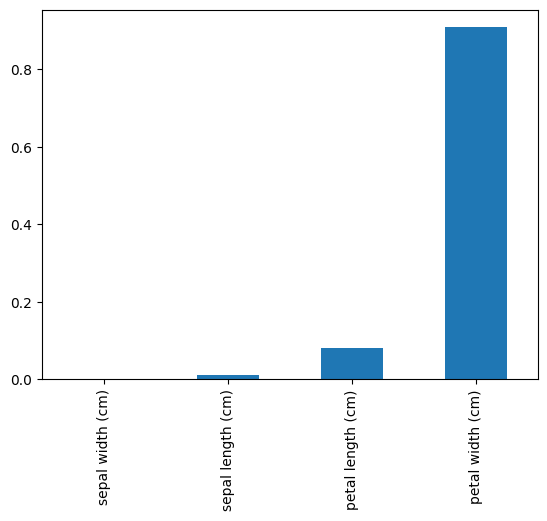

In [127]:
fig, ax = plt.subplots()
col_importances.plot.bar(ax=ax)

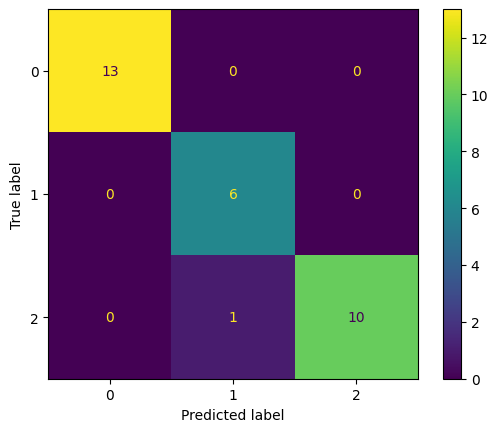

In [128]:
ConfusionMatrixDisplay.from_estimator(modeltree, X_test,y_test)

In [129]:
predicttree=modeltree.predict(X_test)

In [130]:
print(classification_report(y_test,predicttree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Maquinas de sopprte vectorial

# SVM

In [131]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [132]:
#pojemos el pipeline

pipelinesvm = Pipeline(
    steps=[
     ("preprocessing", preprocessor_union),
     ('svm', svm.SVC())  
    ]
)

parasmsvm= [
    {
       "svm__C":[0.9,0.1,0.8,1.1], # que tan liviano quieo el clasificador
       "svm__kernel":["linear", "poly", "rbf"]  
    }
]

gs_svm = GridSearchCV(estimator=pipelinesvm,param_grid=parasmsvm,cv=10,scoring="accuracy")

In [133]:
modelsvm = gs_svm.fit(X_train,y_train)  #entrenemos

In [134]:
print(modelsvm.best_params_,modelsvm.best_score_,modelsvm.score(X_test,y_test))

{'svm__C': 0.1, 'svm__kernel': 'linear'} 0.9833333333333332 0.9


In [135]:
predictSVM= modelsvm.predict(X_test)

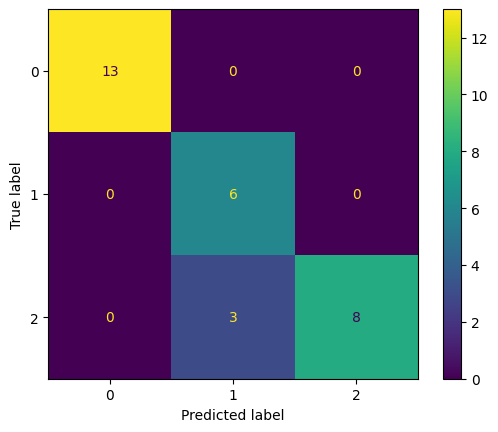

In [136]:
ConfusionMatrixDisplay.from_estimator(modelsvm,X_test,y_test)

In [137]:
print(classification_report(y_test,predictSVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.67      1.00      0.80         6
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.89      0.91      0.88        30
weighted avg       0.93      0.90      0.90        30



In [138]:
from sklearn.feature_selection import SelectKBest, f_regression

clf= svm.SVC(kernel='linear')
anova_filter =SelectKBest(f_regression,k=2)

In [139]:
anomesvm =make_pipeline(
preprocessor_union,
anova_filter,
clf
)

In [141]:
anomesvm

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('robust_column',
                                                 ColumnTransformer(transformers=[('robust',
                                                                                  NumericalIQscaler(columns=['sepal '
                                                                                                             'width '
                                                                                                             '(cm)']),
                                                                                  ['sepal '
                                                                                   'width '
                                                                                   '(cm)'])])),
                                                ('scaler numerical',
                                                 ColumnTransformer(transformers=[('transf. '
                                                                                  'num',
                                                                                  StandardScaler(),
                                                                                  ['sepal '
                                                                                   'length '
                                                                                   '(cm)',
                                                                                   'petal '
                                                                                   'length '
                                                                                   '(cm)',
                                                                                   'petal '
                                                                                   'width '
                                                                                   '(cm)'])]))])),
                ('selectkbest',
                 SelectKBest(k=2,
                             score_func=<function f_regression at 0x000002CDBF64D080>)),
                ('svc', SVC(kernel='linear'))])

In [142]:
anomesvm.fit(X_train,y_train)

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('robust_column',
                                                 ColumnTransformer(transformers=[('robust',
                                                                                  NumericalIQscaler(columns=['sepal '
                                                                                                             'width '
                                                                                                             '(cm)']),
                                                                                  ['sepal '
                                                                                   'width '
                                                                                   '(cm)'])])),
                                                ('scaler numerical',
                                                 ColumnTransformer(transformers=[('transf. '
                                                                                  'num',
                                                                                  StandardScaler(),
                                                                                  ['sepal '
                                                                                   'length '
                                                                                   '(cm)',
                                                                                   'petal '
                                                                                   'length '
                                                                                   '(cm)',
                                                                                   'petal '
                                                                                   'width '
                                                                                   '(cm)'])]))])),
                ('selectkbest',
                 SelectKBest(k=2,
                             score_func=<function f_regression at 0x000002CDBF64D080>)),
                ('svc', SVC(kernel='linear'))])

In [143]:
predict_an_svm= anomesvm.predict(X_test)

In [144]:
print(classification_report(y_test,predict_an_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [145]:
anomesvm[-2].pvalues_

array([8.43110252e-06, 7.71224832e-25, 5.14314543e-60, 3.87939632e-62])

In [146]:
anomesvm[-2].scores_

array([  21.70080379,  172.54567158, 1024.70619844, 1123.29689249])

# KNN

In [147]:
from sklearn.neighbors import KNeighborsClassifier

pipelineknn = make_pipeline(
    preprocessor_union,
    KNeighborsClassifier()
)

paramsknn = [
{

'kneighborsclassifier__n_neighbors': list(range(1,10)),
'kneighborsclassifier__p': list(range(1,5))

}

]

gs_knn =GridSearchCV(estimator=pipelineknn,param_grid=paramsknn,cv=5, scoring='accuracy')
modelknn =gs_knn.fit(X_train,y_train)


In [148]:
print(modelknn.best_params_,modelknn.best_score_,modelknn.score(X_test,y_test))

{'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 2} 0.9666666666666668 0.9333333333333333


In [149]:
predictknn= modelknn.predict(X_test)

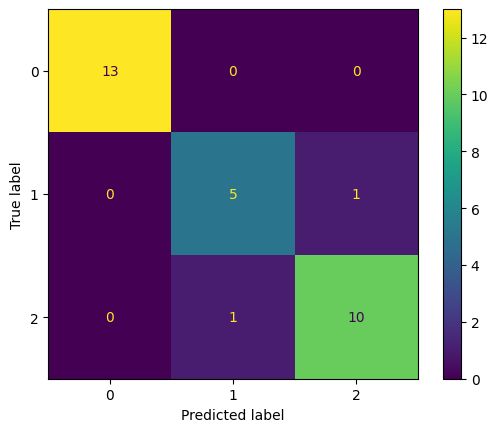

In [150]:
ConfusionMatrixDisplay.from_estimator(modelknn,X_test,y_test)

In [151]:
print(classification_report(y_test,predictknn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.83      0.83         6
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.93      0.93      0.93        30



In [152]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [153]:
knn_= KNeighborsClassifier(n_neighbors=5, p=2)
scoreknn = knn_.fit(X_train.iloc[:,2:],y_train)

c:\Users\javier\miniconda3\envs\py10\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


C:\Users\javier\AppData\Local\Temp\ipykernel_576\692407483.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


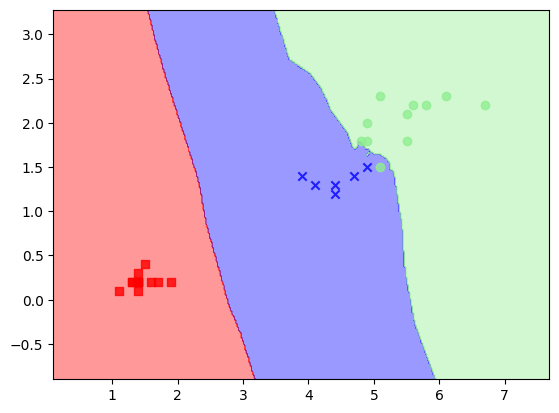

In [78]:
plot_decision_regions(X_test.iloc[:,2:].values,y_test.values,scoreknn)

# Redes neuronales

In [154]:
from sklearn.neural_network  import MLPClassifier

In [155]:
#pipeline d euna red neuronal

pipelinenn= Pipeline(
steps=[
    ('preprocessing', preprocessor_union),
    ("estimador", KNeighborsClassifier(n_neighbors=3,p=2))
]
)
#se ponene los modelos vistos
params_grid=[
{
'estimador':[KNeighborsClassifier()],
 "estimador__n_neighbors": [2,4,8,9],
 "estimador__p":[1,4,5,6]
},
{
'estimador':[MLPClassifier(learning_rate='constante')],
"estimador__hidden_layer_sizes": list(range(10,500,100)),
"estimador__activation": ["logistic","relu","tanh"]
},
{
'estimador':[MLPClassifier(learning_rate='adaptive')],
"estimador__hidden_layer_sizes": list(range(10,500,100)),
"estimador__activation": ["logistic","relu","tanh"]
},

{"estimador": [svm.SVC()],
"estimador__C":[0.9,0.1,0.8,1.1],
"estimador__kernel":["linear", "poly", "rbf"] 

}


]



In [156]:
gridnn =GridSearchCV(pipelinenn,param_grid=params_grid, cv=5, scoring="accuracy")

In [157]:
modelmlp = gridnn.fit(X_train,y_train)

c:\Users\Usuario Autorizado\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Usuario Autorizado\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Usuario Autorizado\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Usuario Autorizado\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

In [158]:
modelmlp.best_estimator_

Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('robust_column',
                                                 ColumnTransformer(transformers=[('robust',
                                                                                  NumericalIQscaler(columns=['sepal '
                                                                                                             'width '
                                                                                                             '(cm)']),
                                                                                  ['sepal '
                                                                                   'width '
                                                                                   '(cm)'])])),
                                                ('scaler numerical',
                                                 ColumnTransformer(transformers=[('transf. '
                                                                                  'num',
                                                                                  StandardScaler(),
                                                                                  ['sepal '
                                                                                   'length '
                                                                                   '(cm)',
                                                                                   'petal '
                                                                                   'length '
                                                                                   '(cm)',
                                                                                   'petal '
                                                                                   'width '
                                                                                   '(cm)'])]))])),
                ('estimador',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=410,
                               learning_rate='adaptive'))])

In [159]:
modelmlp.best_params_

{'estimador': MLPClassifier(learning_rate='adaptive'),
 'estimador__activation': 'tanh',
 'estimador__hidden_layer_sizes': 410}

In [160]:
modelmlp.best_score_

0.975

## Ensambles

![image.png](https://machinelearningmastery.com/wp-content/uploads/2020/11/Bagging-Ensemble.png)
![image.png](https://machinelearningmastery.com/wp-content/uploads/2020/11/Stacking-Ensemble.png)

![image.png](https://machinelearningmastery.com/wp-content/uploads/2020/11/Boosting-Ensemble.png)

## Bagging. Random Forest

In [ ]:
pip install xgboost

In [161]:
from sklearn.ensemble import RandomForestClassifier # importamos 

rfc_200= RandomForestClassifier(n_estimators=200, random_state=0)
rfc_200.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [162]:
predict_rf200= rfc_200.predict(X_test)

In [163]:
print(classification_report(y_test,predict_rf200))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.75      1.00      0.86         6
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



In [164]:
importance_rf200 =rfc_200.feature_importances_

In [165]:
features_score = pd.Series(importance_rf200 , index=X_train.columns).sort_values(ascending=False)

<Axes: xlabel='None', ylabel='None'>

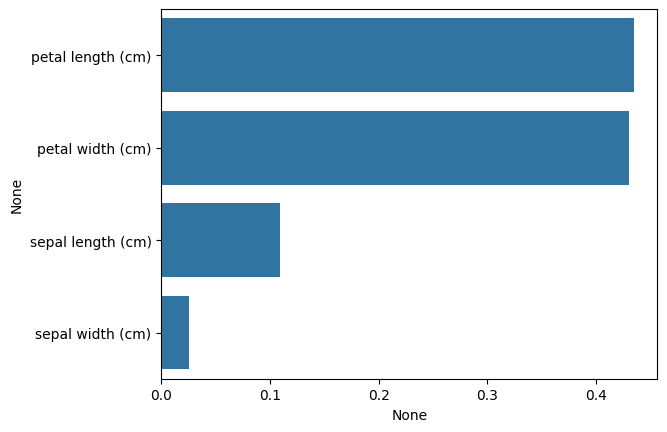

In [166]:
sns.barplot(x= features_score,y=features_score.index)

las 2 primeras son las que mas predominan. En el grafico

para poder tenr mas conocimiento 

In [80]:
pip install shap

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      Traceback (most recent call last):
        File "c:\Users\Usuario Autorizado\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\Usuario Autorizado\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\Usuario Autorizado\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\Usuario A

  Using cached shap-0.44.0.tar.gz (1.1 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for tqdm>=4.27.0 from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached numba-0.58.1.tar.gz (2.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      Traceback (most recent call last):
        File "c:\Users\Usuario Autorizado\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\Usuario Autorizado\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\Usuario Autorizado\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\Usuario A

In [168]:
import shap  #no corre de aqui abajo , hay problema con el pip

ModuleNotFoundError: No module named 'shap'

In [ ]:
explainer=shap.Explainer(rfc_100)

In [ ]:
shap_values=explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values,X_test.values,plot_type="bar",class_names=cn,feature_names=X_test.columns)

In [ ]:
shap.summary_plot(shap_values[1],X_test.values,feature_names=X_test.columns)

In [ ]:
example=8
shap.waterfall_plot(shap.Explanation(values=shap_values[0][example],base_values=explainer.expected_value[0],
                                     data=X_test.iloc[example],
                                     feature_names=X_test.columns.to_list())) #hasta qui no corre

los números azules indican cuál fue el atributo que más peso en porque el modelo clasificó al registro en una clase

Entrenado con los dos mejores features.

In [92]:
rfc_2002col= RandomForestClassifier(n_estimators=200, random_state=0)
rfc_2002col.fit(X_train.iloc[:,2:],y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [98]:
predict_rf2002col= rfc_2002col.predict(X_test.iloc[:,2:])

In [99]:
print(classification_report(y_test,predict_rf2002col))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [100]:
rfc_2002col.score(X_test.iloc[:,2:],y_test)

1.0

In [101]:
estimado_tree = rfc_2002col.estimators_[5]

[Text(0.5, 0.9, 'petal width (cm) <= 0.8\ngini = 0.663\nsamples = 75\nvalue = [36, 46, 38]\nclass = versicolor'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 23\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.7, 'petal width (cm) <= 1.65\ngini = 0.495\nsamples = 52\nvalue = [0, 46, 38]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5, 'petal width (cm) <= 1.55\ngini = 0.085\nsamples = 29\nvalue = [0, 43, 2]\nclass = versicolor'),
 Text(0.15384615384615385, 0.3, 'petal length (cm) <= 5.25\ngini = 0.048\nsamples = 26\nvalue = [0, 40, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 25\nvalue = [0, 40, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.3, 'petal length (cm) <= 5.45\ngini = 0.375\nsamples = 3\nvalue = [0, 3, 1]\nclass = versicolor'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]\

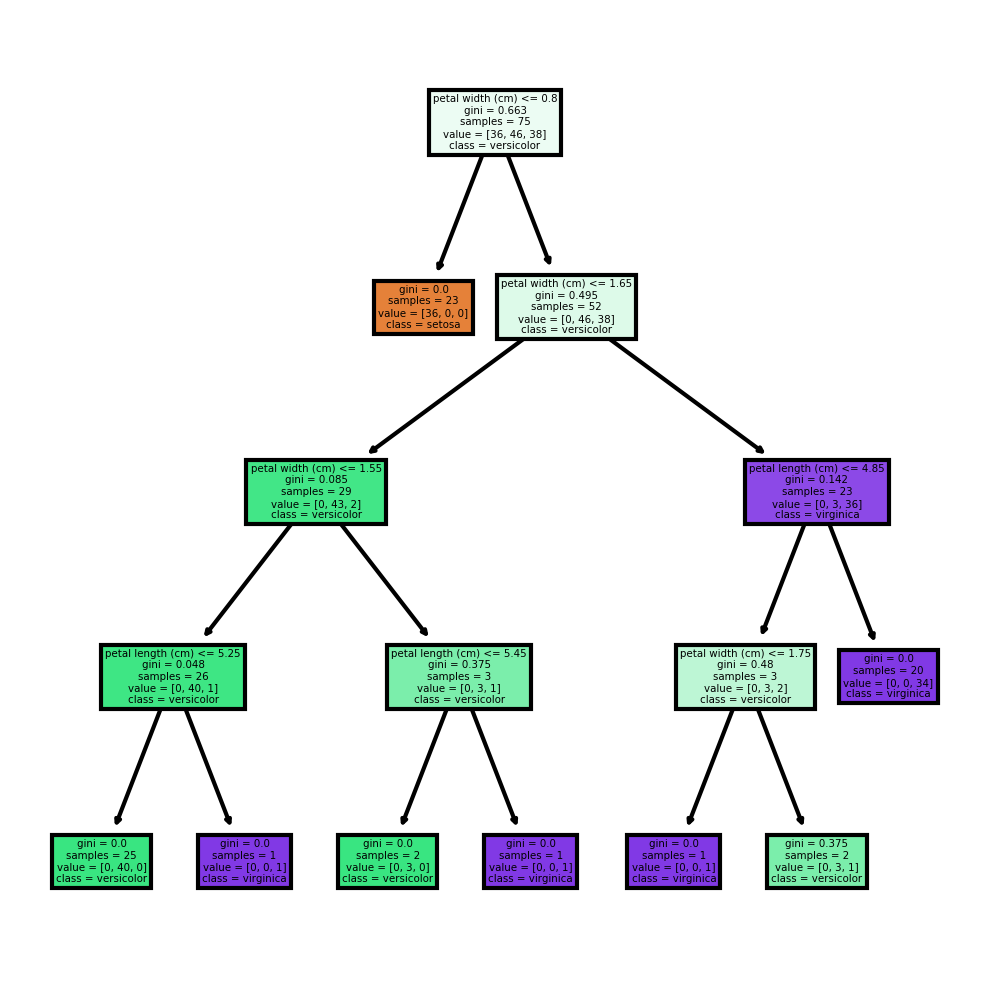

In [102]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
fn = features_num[1:]
cn = ['setosa', 'versicolor', 'virginica']
tree.plot_tree(estimado_tree, feature_names = fn, 
               class_names=cn,
               filled = True)

# stacking

In [103]:
from sklearn.ensemble import StackingClassifier

In [104]:
base_learning= [
    ("rf", RandomForestClassifier(n_estimators=150) ),
    ("tree", tree.DecisionTreeClassifier() ) ,
    ("nb", GaussianNB() ),
]

stacking= StackingClassifier(estimators=base_learning,final_estimator=LogisticRegression(),cv=10)

In [105]:
stacking

StackingClassifier(cv=10,
                   estimators=[('rf', RandomForestClassifier(n_estimators=150)),
                               ('tree', DecisionTreeClassifier()),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [106]:
stacking_pipeline = make_pipeline(
 preprocessor_union,
 stacking
)

In [107]:
stacking_pipeline

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('robust_column',
                                                 ColumnTransformer(transformers=[('robust',
                                                                                  NumericalIQscaler(columns=['sepal '
                                                                                                             'width '
                                                                                                             '(cm)']),
                                                                                  ['sepal '
                                                                                   'width '
                                                                                   '(cm)'])])),
                                                ('scaler numerical',
                                                 ColumnTransformer(transformers=[('transf. '
                                                                                  'num',
                                                                                  StandardScaler(),
                                                                                  ['sepal '
                                                                                   'length '
                                                                                   '(cm)',
                                                                                   'petal '
                                                                                   'length '
                                                                                   '(cm)',
                                                                                   'petal '
                                                                                   'width '
                                                                                   '(cm)'])]))])),
                ('stackingclassifier',
                 StackingClassifier(cv=10,
                                    estimators=[('rf',
                                                 RandomForestClassifier(n_estimators=150)),
                                                ('tree',
                                                 DecisionTreeClassifier()),
                                                ('nb', GaussianNB())],
                                    final_estimator=LogisticRegression()))])

In [108]:
stacking_pipeline.fit(X_train,y_train)

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('robust_column',
                                                 ColumnTransformer(transformers=[('robust',
                                                                                  NumericalIQscaler(columns=['sepal '
                                                                                                             'width '
                                                                                                             '(cm)']),
                                                                                  ['sepal '
                                                                                   'width '
                                                                                   '(cm)'])])),
                                                ('scaler numerical',
                                                 ColumnTransformer(transformers=[('transf. '
                                                                                  'num',
                                                                                  StandardScaler(),
                                                                                  ['sepal '
                                                                                   'length '
                                                                                   '(cm)',
                                                                                   'petal '
                                                                                   'length '
                                                                                   '(cm)',
                                                                                   'petal '
                                                                                   'width '
                                                                                   '(cm)'])]))])),
                ('stackingclassifier',
                 StackingClassifier(cv=10,
                                    estimators=[('rf',
                                                 RandomForestClassifier(n_estimators=150)),
                                                ('tree',
                                                 DecisionTreeClassifier()),
                                                ('nb', GaussianNB())],
                                    final_estimator=LogisticRegression()))])

In [109]:
predict_starcking= stacking_pipeline.predict(X_test)

In [110]:
print(classification_report(y_test,predict_starcking))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [111]:
 ### datos

 ### model1 model2 model3

 ## modelfinal

 #----------------------------------

 ##### datos

 ### model1 model2 model3

### model4 model5

 ### modelfinal

In [112]:
layer1= [
    ("rf", RandomForestClassifier(n_estimators=150) ),
    ("tree", tree.DecisionTreeClassifier() ) ,
    ("nb", GaussianNB() ),
]
layer2 =[
    ("svm", svm.SVC()),
    ("lr",LogisticRegression())
]

modellayer2 = StackingClassifier(estimators=layer2,final_estimator=LogisticRegression(),cv=10)

modeltotal = StackingClassifier(estimators=layer1, final_estimator=modellayer2)

In [113]:
modeltotal

StackingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=150)),
                               ('tree', DecisionTreeClassifier()),
                               ('nb', GaussianNB())],
                   final_estimator=StackingClassifier(cv=10,
                                                      estimators=[('svm',
                                                                   SVC()),
                                                                  ('lr',
                                                                   LogisticRegression())],
                                                      final_estimator=LogisticRegression()))

In [114]:
modeltotal.fit(X_train,y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=150)),
                               ('tree', DecisionTreeClassifier()),
                               ('nb', GaussianNB())],
                   final_estimator=StackingClassifier(cv=10,
                                                      estimators=[('svm',
                                                                   SVC()),
                                                                  ('lr',
                                                                   LogisticRegression())],
                                                      final_estimator=LogisticRegression()))

In [115]:
predictstacking2 =modeltotal.predict(X_test)

In [116]:
print(classification_report(y_test,predictstacking2 ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Boosting

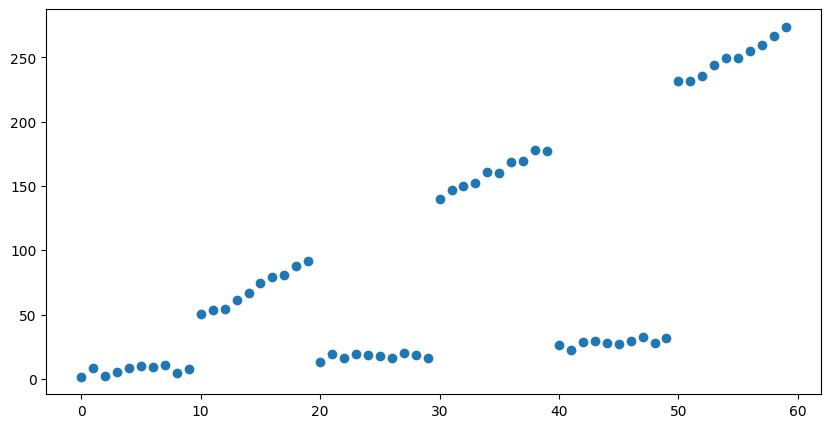

In [117]:
x1 = np.arange(0, 60)
y1 = map(lambda x1: x1 / 2 + (x1 // 10) % 2 * 20 * x1 / 5 + np.random.random() * 10, x1)
df = pd.DataFrame({'x': x1,'y': y1})
X=df[["x"]]
y = df.y

# Plot mock data
plt.figure(figsize=(10, 5))
plt.scatter(X, df.y)
plt.show()

In [118]:
from sklearn.ensemble import GradientBoostingRegressor

In [119]:
params= {
"n_estimators": 3,
'max_depth':1,
'learning_rate':1
}

gboost= GradientBoostingRegressor(**params)
gboost.fit(X, y)

GradientBoostingRegressor(learning_rate=1, max_depth=1, n_estimators=3)

c:\Users\javier\miniconda3\envs\py10\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
c:\Users\javier\miniconda3\envs\py10\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names


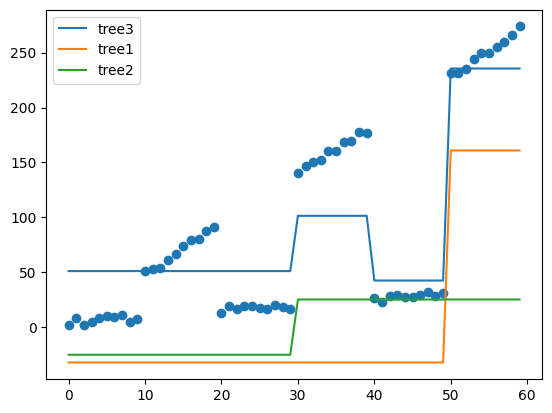

In [120]:
plt.scatter(X,y)
plt.plot(X,gboost.predict(X),label="tree3")
plt.plot(X,gboost.estimators_[0][0].predict(X),label="tree1")
plt.plot(X,gboost.estimators_[1][0].predict(X),label="tree2")
plt.legend()

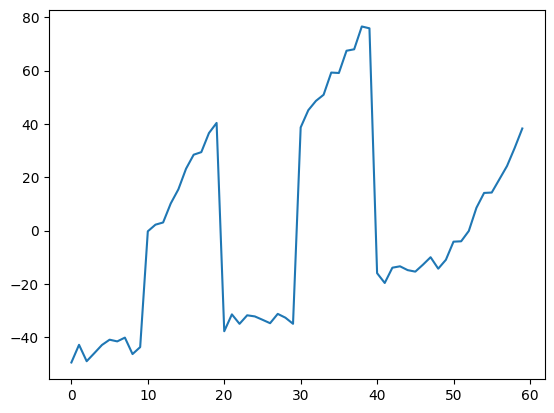

In [121]:
plt.plot(X, y-gboost.predict(X))

[Text(0.5, 0.75, 'x <= 49.5\nfriedman_mse = 7895.87\nsamples = 60\nvalue = 0.0'),
 Text(0.25, 0.25, 'friedman_mse = 3223.087\nsamples = 50\nvalue = -32.182'),
 Text(0.75, 0.25, 'friedman_mse = 189.298\nsamples = 10\nvalue = 160.91')]

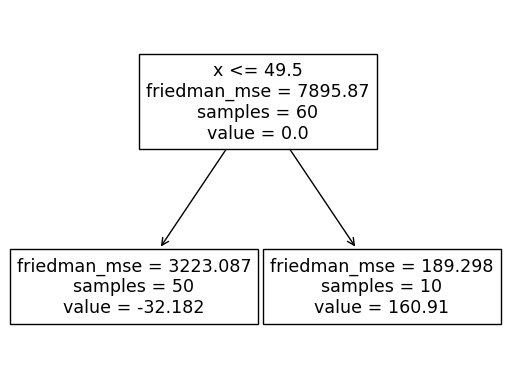

In [125]:
tree_boosting = gboost.estimators_[0][0]
tree.plot_tree(tree_boosting, feature_names=["x"], class_names=["y"])

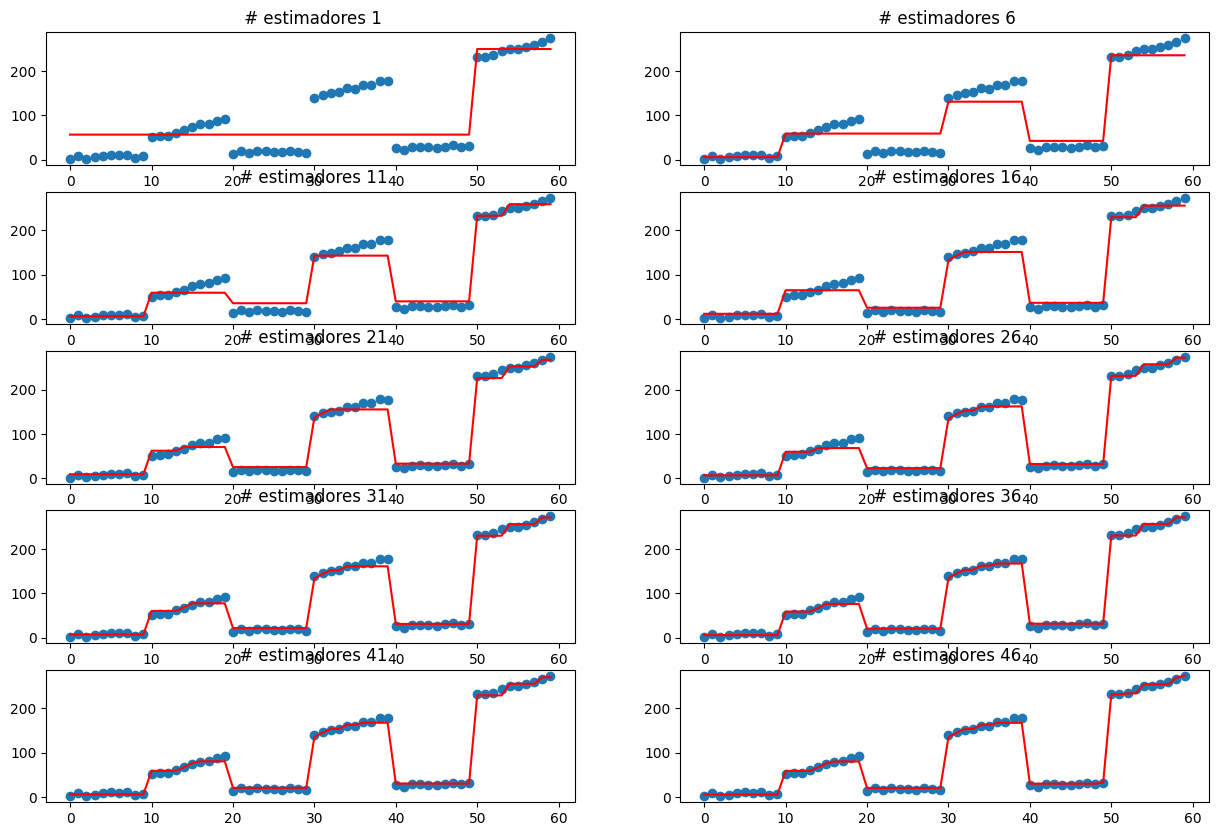

In [126]:
f ,ax =plt.subplots(5,2, figsize=(15,10) )
for idx, n_est in enumerate(range(1,50, 5)):
    params["n_estimators"]=n_est
    gboost =GradientBoostingRegressor(**params)
    gboost.fit(X,y)
    subplot =ax[idx//2][idx % 2]
    subplot.set_title(f" # estimadores {n_est}")
    subplot.scatter(X,y)
    subplot.plot(X,gboost.predict(X), color='r')

al inciolos primeros arboles no preicen bien algunos puntos entonces los demas arboles lo predicen mejor

In [127]:
from sklearn.ensemble import AdaBoostClassifier
adam =AdaBoostClassifier(n_estimators=3)
adam.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=3)

 # XGboost
https://xgboost.readthedocs.io/en/stable/

In [128]:
#!pip install xgboost
import xgboost as xgb

In [129]:
xgb_model= xgb.XGBClassifier(objective="multi:softprob")
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [130]:
xgb_model.score(X_test,y_test)

0.9666666666666667

In [131]:
from sklearn.model_selection import StratifiedKFold

In [132]:
xgb_class= xgb.XGBClassifier()

In [133]:
params= {
  "objective":["multi:softprob"],
  "eval_metric":["auc"],
  "max_depth":[1,3],
  "early_stopping_rounds":[5], #es la paciencia
  "learning_rate": [0.01,0.1],
  "n_estimators":[100]
}

GXB= GridSearchCV(estimator=xgb_class, param_grid=params,cv=3,scoring='accuracy',verbose=1)

In [134]:
GXB.fit(X_train,y_train, eval_set=[(X_train,y_train), (X_test,y_test)]) #aqui pone el grupo de validacion

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[0]	validation_0-auc:0.97768	validation_1-auc:0.99057
[1]	validation_0-auc:0.97768	validation_1-auc:0.99057
[2]	validation_0-auc:0.97768	validation_1-auc:0.99057
[3]	validation_0-auc:0.97768	validation_1-auc:0.99057
[4]	validation_0-auc:0.97768	validation_1-auc:0.99057
[0]	validation_0-auc:0.95967	validation_1-auc:0.99057
[1]	validation_0-auc:0.95967	validation_1-auc:0.99057
[2]	validation_0-auc:0.95967	validation_1-auc:0.99057
[3]	validation_0-auc:0.95967	validation_1-auc:0.99057
[4]	validation_0-auc:0.95967	validation_1-auc:0.99057
[5]	validation_0-auc:0.95967	validation_1-auc:0.99057
[0]	validation_0-auc:0.97822	validation_1-auc:0.97328
[1]	validation_0-auc:0.97822	validation_1-auc:0.97328
[2]	validation_0-auc:0.97822	validation_1-auc:0.97328
[3]	validation_0-auc:0.97822	validation_1-auc:0.97328
[4]	validation_0-auc:0.97822	validation_1-auc:0.97328
[5]	validation_0-auc:0.98480	validation_1-auc:0.98586
[6]	validation_0-auc:0

[0]	validation_0-auc:0.98380	validation_1-auc:0.99843
[1]	validation_0-auc:0.98380	validation_1-auc:0.99843
[2]	validation_0-auc:0.98380	validation_1-auc:0.99843
[3]	validation_0-auc:0.98380	validation_1-auc:0.99843
[4]	validation_0-auc:0.98380	validation_1-auc:0.99843
[5]	validation_0-auc:0.98380	validation_1-auc:0.99843
[0]	validation_0-auc:0.98480	validation_1-auc:0.98586
[1]	validation_0-auc:0.98480	validation_1-auc:0.98586
[2]	validation_0-auc:0.98480	validation_1-auc:0.98586
[3]	validation_0-auc:0.98480	validation_1-auc:0.98586
[4]	validation_0-auc:0.98480	validation_1-auc:0.98586
[0]	validation_0-auc:0.97768	validation_1-auc:0.99057
[1]	validation_0-auc:0.97768	validation_1-auc:0.99057
[2]	validation_0-auc:0.98130	validation_1-auc:0.99057
[3]	validation_0-auc:0.99756	validation_1-auc:0.99843
[4]	validation_0-auc:0.99798	validation_1-auc:0.99843
[5]	validation_0-auc:0.99798	validation_1-auc:0.99843
[6]	validation_0-auc:0.99788	validation_1-auc:0.99843
[7]	validation_0-auc:0.99788

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'early_stopping_rounds': [5], 'eval_metric': ['auc'],
                         'learning_rate': [0.01, 0.1], 'max_depth': [1, 3],
                         'n_estimators': [100],
                         'objective': ['multi:softprob']},
             scoring='accuracy', verbose=1)

los ultimos son los mejores.

In [135]:
GXB.best_params_

{'early_stopping_rounds': 5,
 'eval_metric': 'auc',
 'learning_rate': 0.01,
 'max_depth': 1,
 'n_estimators': 100,
 'objective': 'multi:softprob'}

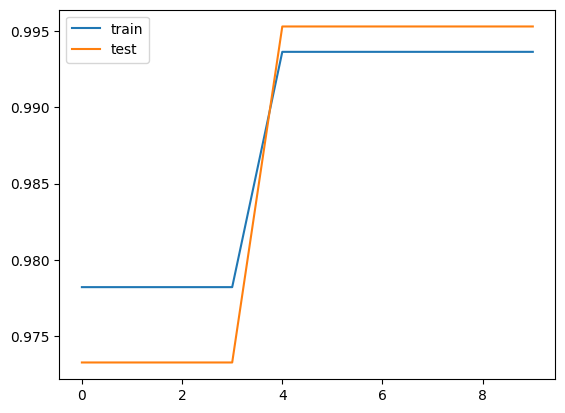

In [136]:
plt.plot(GXB.best_estimator_.evals_result()["validation_0"]["auc"], label='train')
plt.plot(GXB.best_estimator_.evals_result()["validation_1"]["auc"], label='test')
plt.legend()

In [137]:
GXB.best_estimator_.evals_result()

{'validation_0': OrderedDict([('auc',
               [0.9782156974225688,
                0.9782156974225688,
                0.9782156974225688,
                0.9782156974225688,
                0.9936241065627031,
                0.9936241065627031,
                0.9936241065627031,
                0.9936241065627031,
                0.9936241065627031,
                0.9936241065627031])]),
 'validation_1': OrderedDict([('auc',
               [0.9732821637426899,
                0.9732821637426899,
                0.9732821637426899,
                0.9732821637426899,
                0.9952850877192981,
                0.9952850877192981,
                0.9952850877192981,
                0.9952850877192981,
                0.9952850877192981,
                0.9952850877192981])])}

In [138]:
#!pip install mlflow

In [140]:
import mlflow